<a href="https://colab.research.google.com/github/KambhampatiAdvaith/AIML-IIITH/blob/main/AIML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [12]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [5]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.shape

(1025, 14)

In [7]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [8]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,0,2,normal,No_disease
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,normal,No_disease
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,normal,No_disease
3,61,Male,0,148,203,0,1,161,No,0.0,0,1,normal,No_disease
4,62,Female,0,138,294,1,1,106,No,1.9,0,3,reversable_defect,No_disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

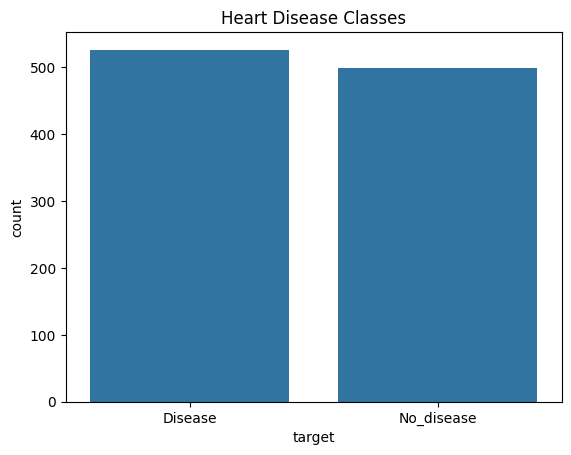

In [10]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

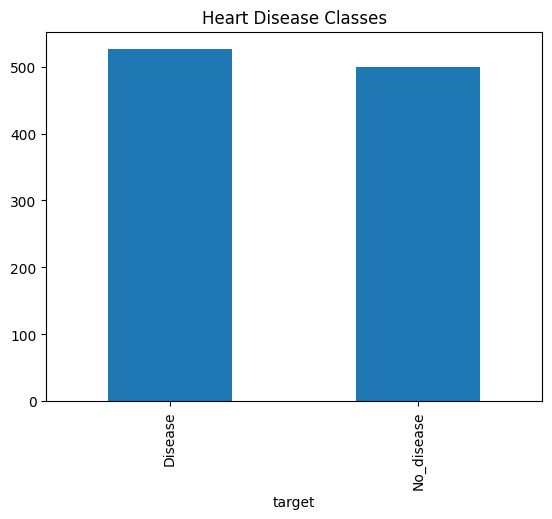

In [11]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

<ipython-input-20-9019db8bbe0c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


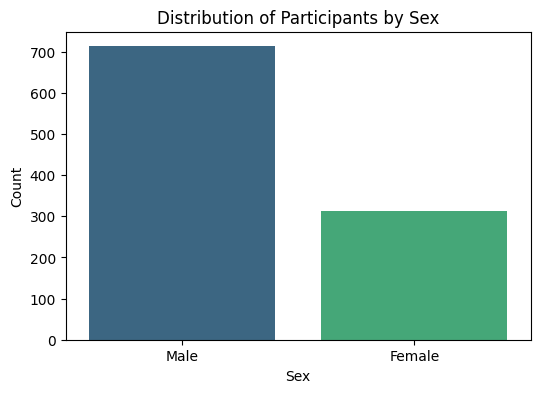

In [20]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to doimport pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming the file is named 'heart.csv' in the working directory)
df = pd.read_csv("heart.csv")

# Map the 'sex' column to meaningful labels (0: Female, 1: Male)
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot for the 'sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Participants by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()




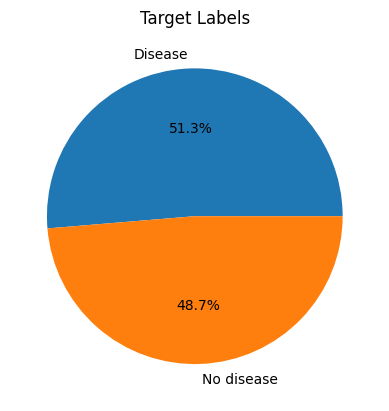

In [21]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

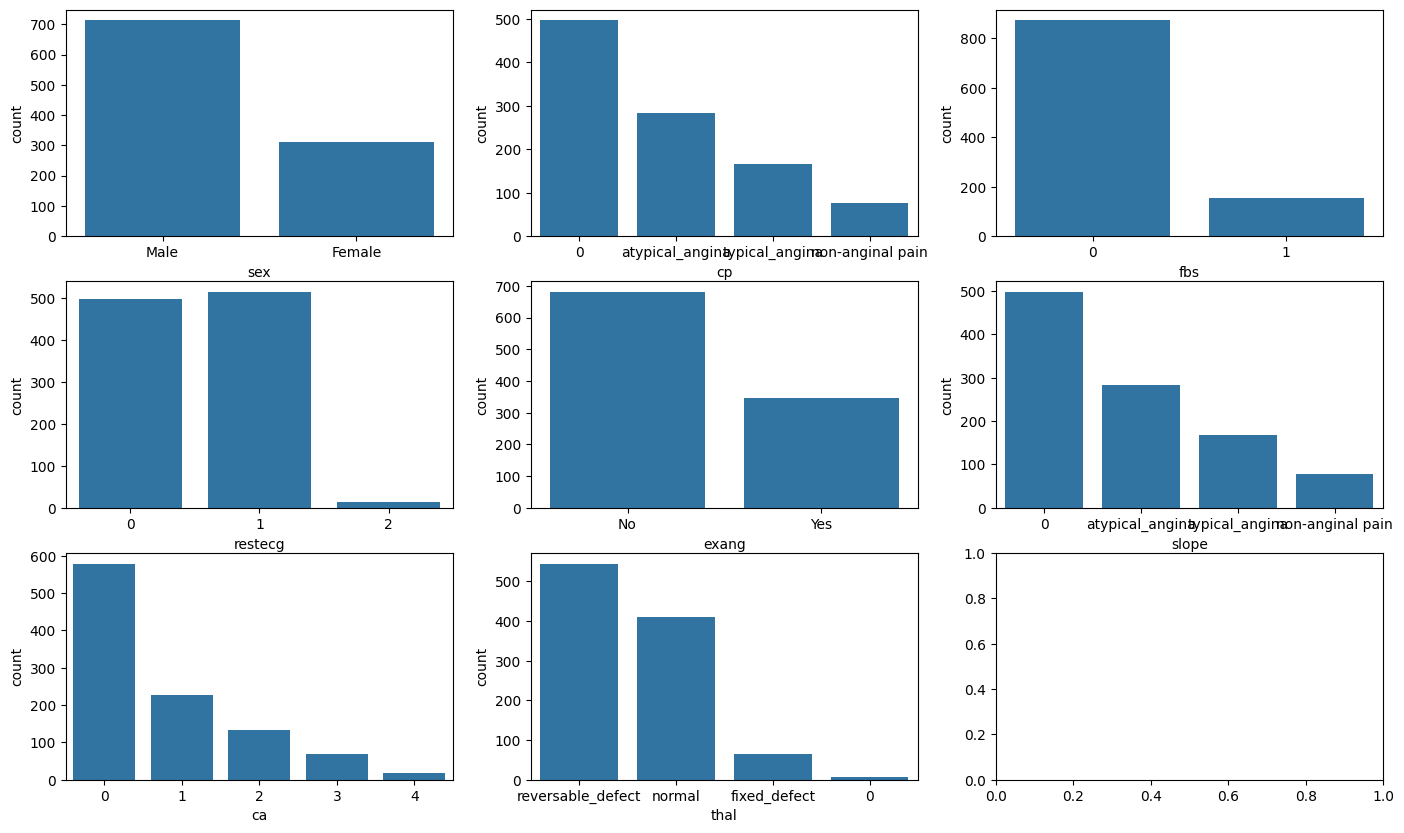

In [22]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

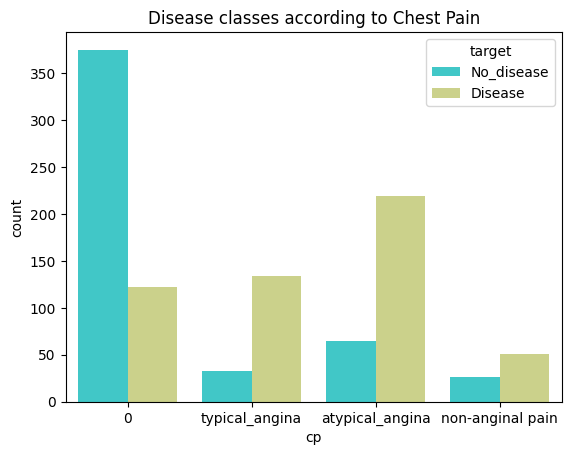

In [23]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

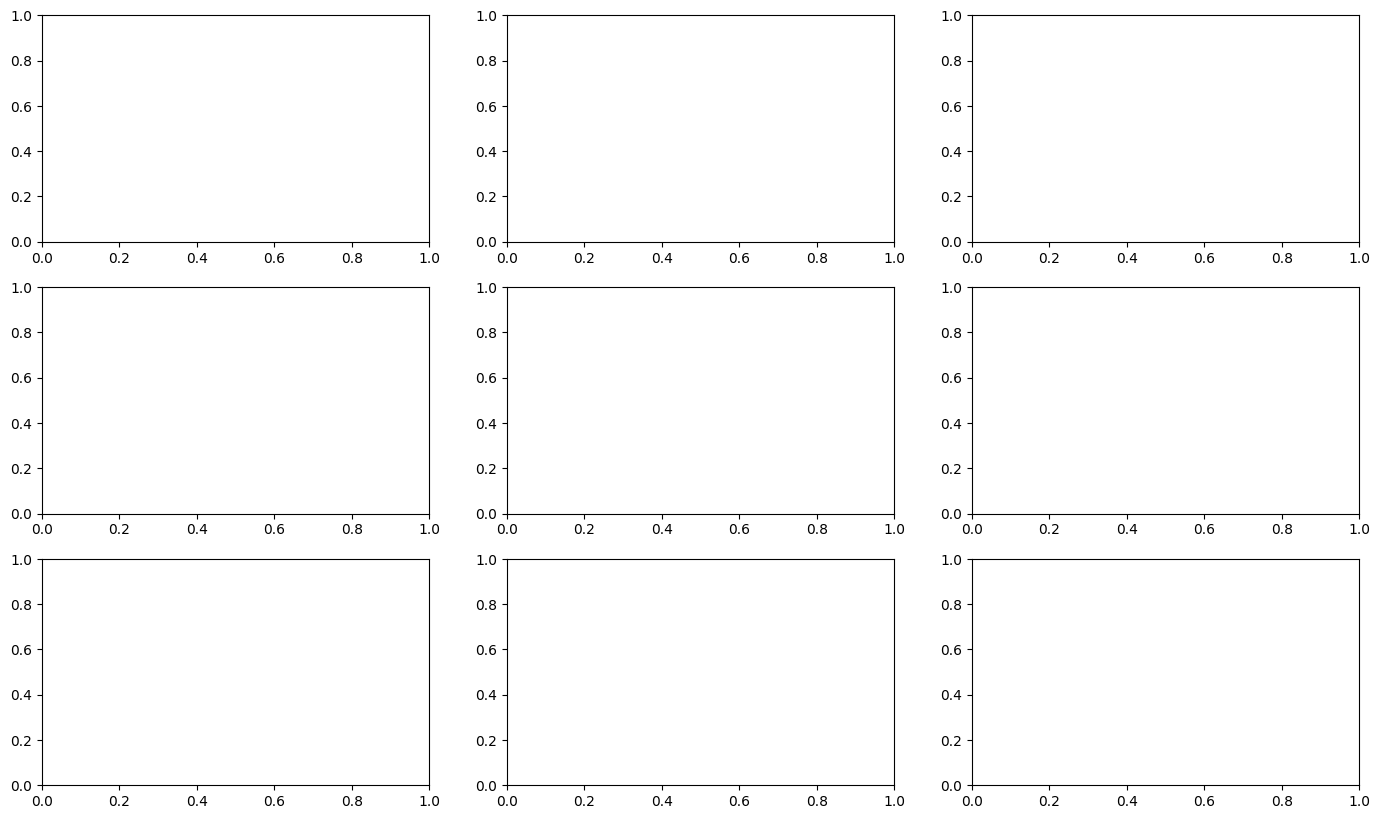

In [24]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


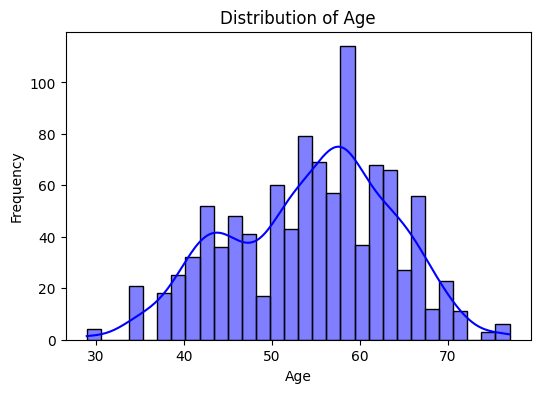

In [27]:
# Visualising the distribution of the continous variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart.csv")

# Plot the distribution of 'age' (or replace 'age' with the desired variable)
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


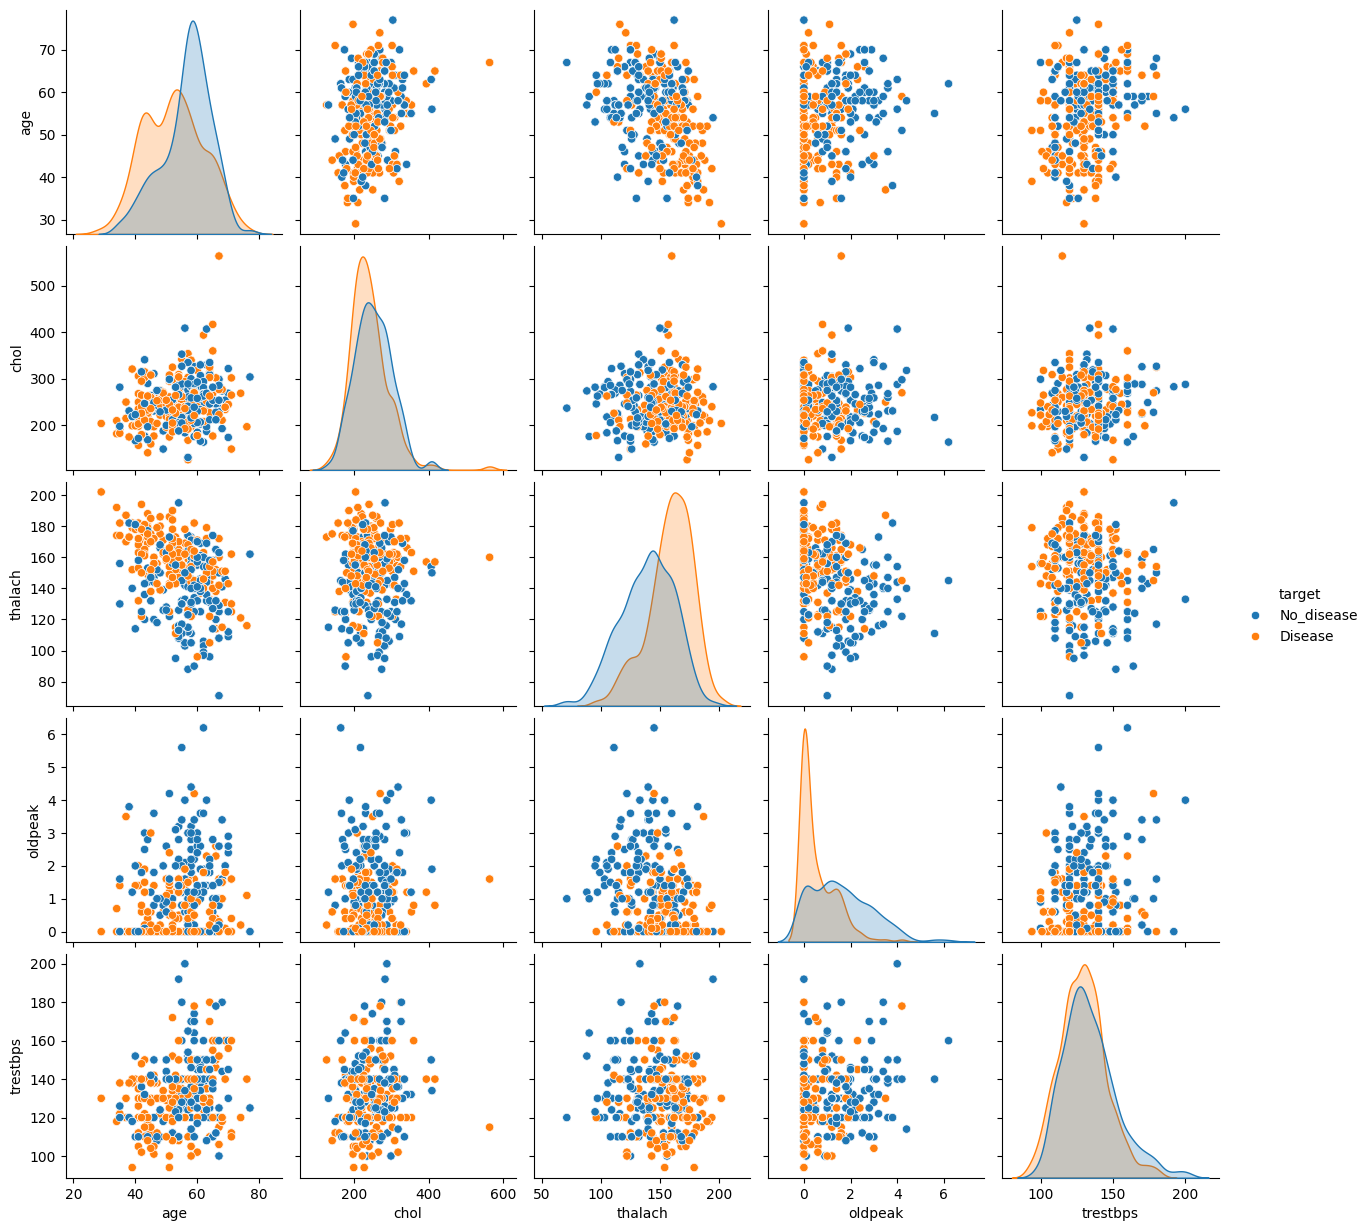

In [28]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

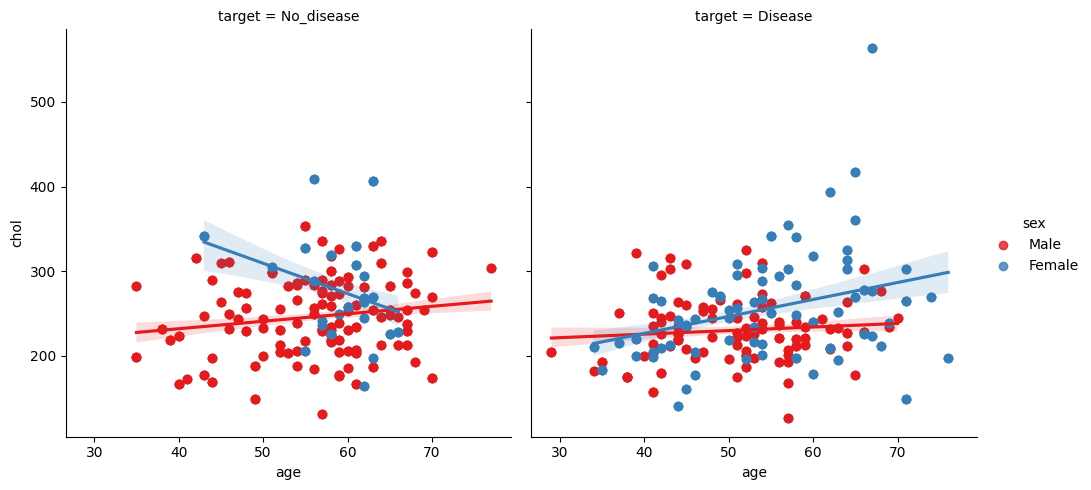

In [29]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

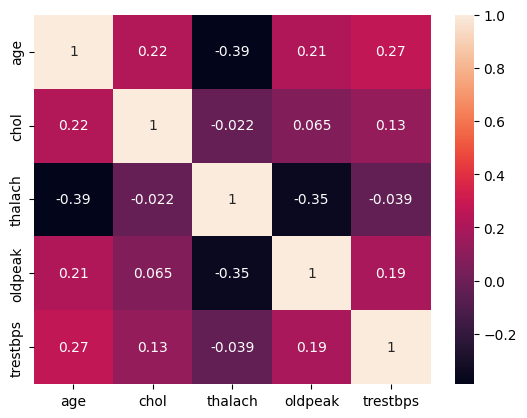

In [30]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

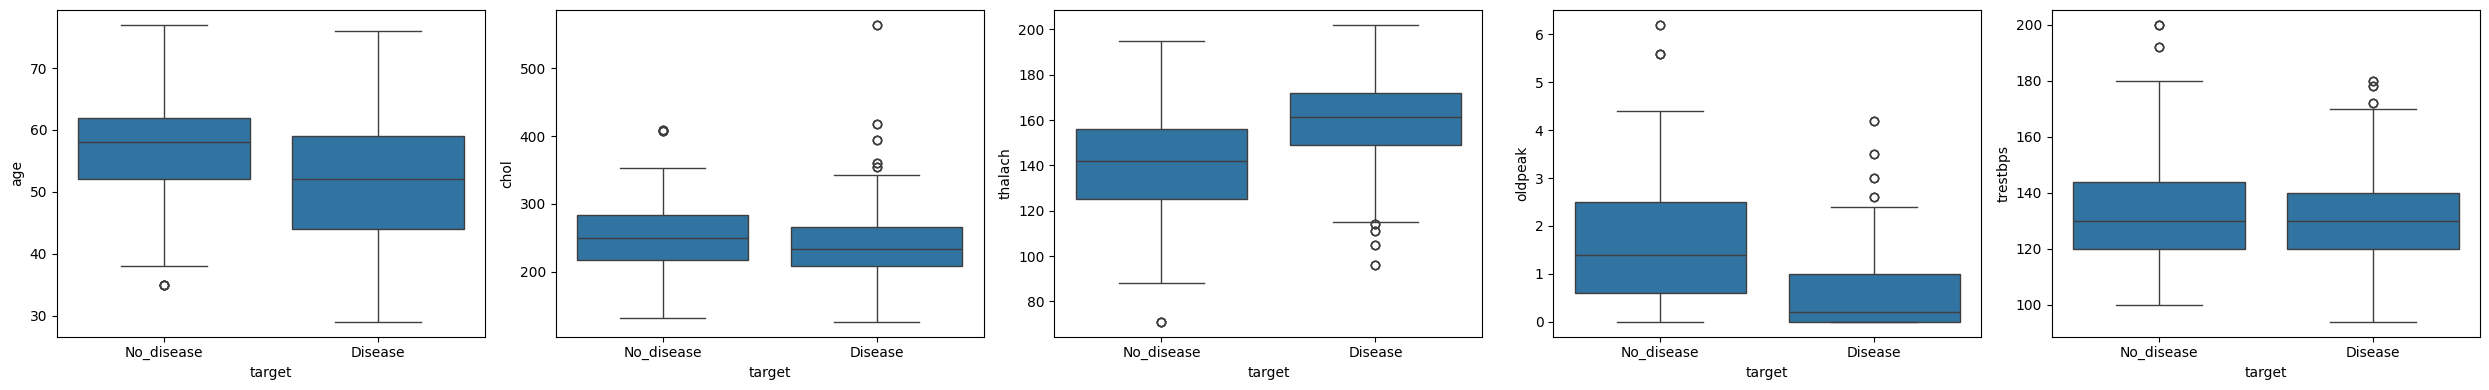

In [31]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

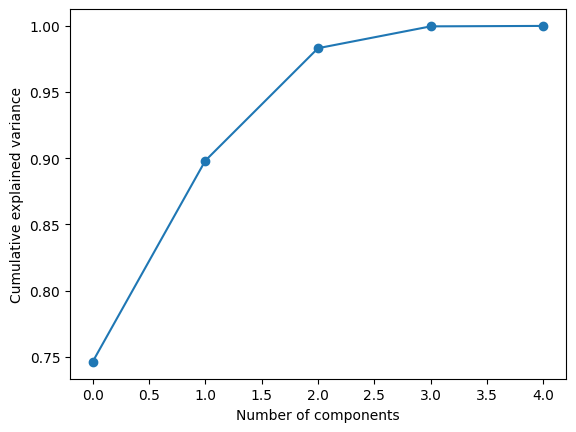

In [32]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


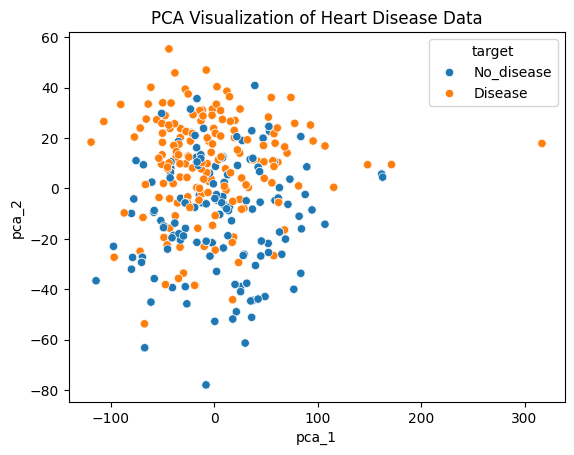

In [33]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


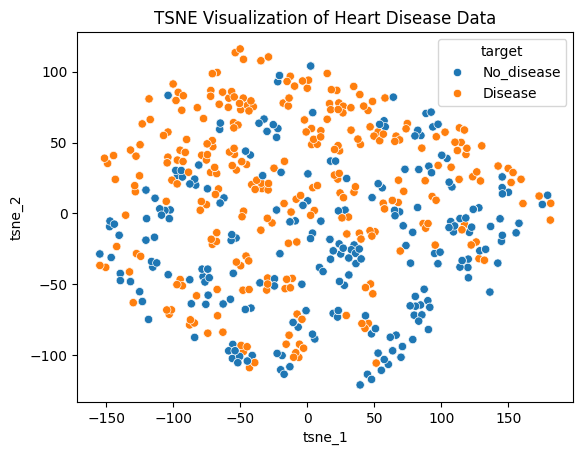

In [34]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [37]:
#1st question
percentage_with_disease = (df['target'].value_counts(normalize=True)[1]) * 100
print(f"Percentage of Samples with Disease: {percentage_with_disease:.2f}%")


Percentage of Samples with Disease: 51.32%


2. Use statistical tests (e.g., t-tests) to identify features with significant differences.
Commonly identified features in such datasets include:
age
oldpeak
max_heart_rate_achieved (or thalach)

3. t-SNE often provides better separation due to its focus on preserving pairwise relationships.
PCA might show some clustering but generally less distinct separation compared to t-SNE.

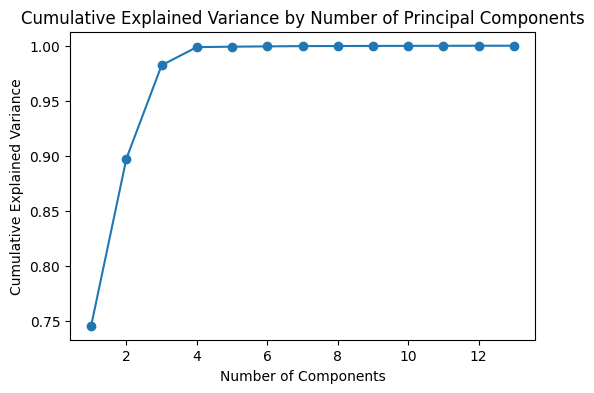

In [40]:
#4th question
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop('target', axis=1))  # Drop target column if necessary
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [39]:
#5th question
correlation_matrix = df.corr()
correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = correlations[correlations < 1].head(1)
print("Highest Correlation:")
print(top_correlations)


Highest Correlation:
target  cp    0.434854
dtype: float64


t-SNE often provides better separation due to its focus on preserving pairwise relationships.
PCA might show some clustering but generally less distinct separation compared to t-SNE.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [79]:
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Imports a more complex imputer for missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
data = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

In [44]:
data.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


cleaning and filling the missing values in the data

In [80]:
# Check for missing values
missing_summary = data.isnull().sum()
print(missing_summary)






Unnamed: 0    177
Calories       85
Fat (g)        85
Carb. (g)      85
Fiber (g)      85
Protein        85
Sodium         85
dtype: int64


In [54]:
import numpy as np

# Check if the column 'Total Fat (g)' exists
if 'Total Fat (g)' in data.columns:
    # Replace specific values with NaN
    data['Total Fat (g)'] = data['Total Fat (g)'].replace(['Varies', 'varies'], np.NaN)

    # Convert column to numeric
    data['Total Fat (g)'] = data['Total Fat (g)'].astype(np.float64)

    # Fill missing values with the mean
    data['Total Fat (g)'] = data['Total Fat (g)'].fillna(data['Total Fat (g)'].mean())
else:
    print("Column 'Total Fat (g)' not found in the dataset.")


Column 'Total Fat (g)' not found in the dataset.


In [58]:
import pandas as pd

# Check and clean column names
print("Columns in the dataset:", data.columns)
data.columns = data.columns.str.strip()

# Process the 'Total Fat (g)' column if it exists
if 'Total Fat (g)' in data.columns:
    data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')
else:
    print("Column 'Total Fat (g)' not found. Verify column names.")


Columns in the dataset: Index(['Unnamed: 0', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)',
       'Protein', 'Sodium'],
      dtype='object')
Column 'Total Fat (g)' not found. Verify column names.


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [60]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index([], dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [64]:
# Clean column names
data.columns = data.columns.str.strip()

# Check if 'Beverage_category' exists
if 'Beverage_category' in data.columns:
    # Create 'Is_Tea' column
    data['Is_Tea'] = data['Beverage_category'].str.contains('Tea', case=False, na=False)

    # Analyze the new column
    print("Tea vs Non-Tea Counts:")
    print(data['Is_Tea'].value_counts())

    # Visualize the distribution
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Is_Tea', data=data, palette='pastel')
    plt.title('Distribution of Tea vs Non-Tea Drinks')
    plt.xlabel('Is Tea')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Non-Tea', 'Tea'])
    plt.show()
else:
    print("Column 'Beverage_category' not found in the dataset.")


Column 'Beverage_category' not found in the dataset.


In [65]:
# Ensure column names are clean
data.columns = data.columns.str.strip()

# Check if 'Beverage_category' exists before applying the transformation
if 'Beverage_category' in data.columns:
    # Create the 'Tea' column using a lambda function
    data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

    # Drop the 'Beverage_category' column
    data = data.drop('Beverage_category', axis=1)

    # Verify changes
    print("Updated Dataset:")
    print(data.head())
else:
    print("Column 'Beverage_category' not found in the dataset.")


Column 'Beverage_category' not found in the dataset.


In [55]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [67]:
# Ensure column names are clean
data.columns = data.columns.str.strip()

# Check if the required columns exist
if 'Beverage' in data.columns and 'Beverage_prep' in data.columns:
    # Perform one-hot encoding
    data = pd.get_dummies(data, columns=['Beverage', 'Beverage_prep'], prefix=['bev', 'bevp'])
    print("One-hot encoding completed successfully.")
else:
    print("The columns 'Beverage' and/or 'Beverage_prep' are missing.")



The columns 'Beverage' and/or 'Beverage_prep' are missing.


In [68]:

data = data.replace({True: 1, False: 0})


In [71]:
import numpy as np

# Remove '%' and convert to float64
def convert_to_float(x):
    try:
        return np.float64(str(x).replace('%', ''))
    except ValueError:
        return np.nan  # Return NaN if conversion fails

data = data.applymap(convert_to_float)

# Verify the changes
print(data.head())


   Unnamed: 0  Calories  Fat (g)  Carb. (g)  Fiber (g)  Protein  Sodium
0         NaN      45.0      0.0       11.0        0.0      0.0    10.0
1         NaN       NaN      NaN        NaN        NaN      NaN     NaN
2         NaN       NaN      NaN        NaN        NaN      NaN     NaN
3         NaN      80.0      0.0       18.0        1.0      0.0    10.0
4         NaN      60.0      0.0       14.0        1.0      0.0    10.0


<ipython-input-71-bda560cce2c7>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(convert_to_float)


In [70]:
data.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Calories    92 non-null     float64
 2   Fat (g)     92 non-null     float64
 3   Carb. (g)   92 non-null     float64
 4   Fiber (g)   92 non-null     float64
 5   Protein     92 non-null     float64
 6   Sodium      92 non-null     float64
dtypes: float64(7)
memory usage: 9.8 KB


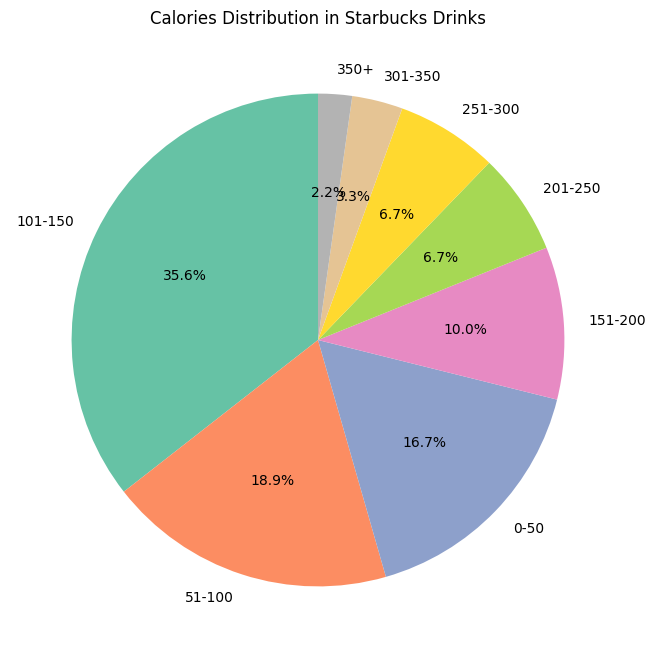

In [86]:
## to do

# Define categories for Calories
bins = [0, 50, 100, 150, 200, 250, 300, 350, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '350+']

# Create a new column 'Calorie_Range' by categorizing the 'Calories' column
data['Calorie_Range'] = pd.cut(data['Calories'], bins=bins, labels=labels)

# Count the number of occurrences in each category
calorie_counts = data['Calorie_Range'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
calorie_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(calorie_counts)))
plt.title('Calories Distribution in Starbucks Drinks')
plt.ylabel('')
plt.show()




In [88]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

# Drop non-numeric columns and rows with missing values
numeric_data = data.select_dtypes(include=[np.number])

# Drop rows with missing values
numeric_data = numeric_data.dropna()

# Check if there is any data left after dropping rows with missing values
if numeric_data.empty:
    print("No numeric data available after cleaning.")
else:
    # Perform PCA
    pca = PCA()
    pca.fit(numeric_data)

    # Plot the explained variance ratio
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()


No numeric data available after cleaning.


In [91]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

# Select only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Drop rows with missing values
numeric_data = numeric_data.dropna()

# Check if there is any valid data
if numeric_data.empty:
    print("No valid data available for correlation matrix.")
else:
    # Calculate the correlation matrix
    corr_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap of Starbucks Nutrition Data')
    plt.show()


No valid data available for correlation matrix.


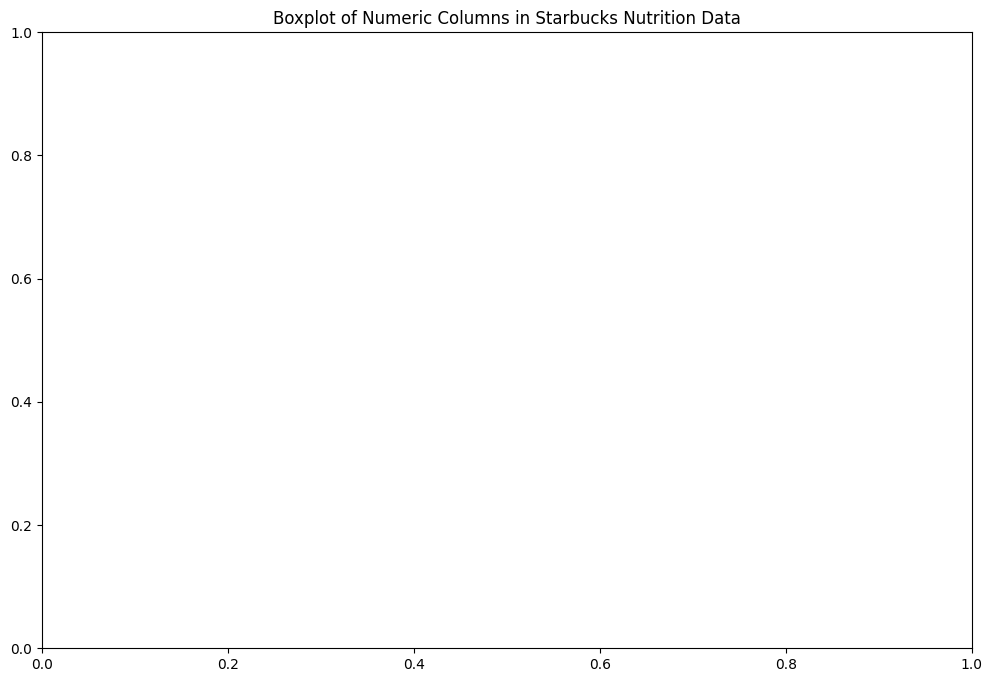

In [89]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

# Drop non-numeric columns and rows with missing values
numeric_data = data.select_dtypes(include=[np.number])

# Drop rows with missing values
numeric_data = numeric_data.dropna()

# Create a boxplot of all numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data, orient='h')
plt.title("Boxplot of Numeric Columns in Starbucks Nutrition Data")
plt.show()



To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.

In conducting a preliminary Exploratory Data Analysis (EDA), we have employed a variety of techniques to extract insights from the datasets. Our analysis goes beyond initial visualizations, leveraging several methods to gain a thorough understanding of the data. Among the many tools available for EDA, the pandas profiling library stands out as an exceptionally user-friendly option. This tool simplifies the process of examining the fundamental distribution of data within a dataset by generating detailed profile reports. These reports offer a comprehensive overview of the dataset's characteristics, including variable distributions, missing values, and potential correlations between variables.

Additionally, we are utilizing Google Colab notebooks, which integrate advanced AI tools to further enhance data visualization and analysis. These tools automatically generate insightful plots and statistics, adding depth to the data exploration process.

